Title Page / Header Cell 

Module: CT7201 Python Notebooks and Scripting 

Assignment Title: Earthquake Data Analysis Using Python Scripting (2023 Global Dataset) 

Student Names & IDs 

Date of submission 

Tutor Name 


Executive Summary (Short Overview) 

A single short paragraph that explains: 

What the project does 

What the dataset contains 

What analyses and models you will build 

The purpose of your Python scripting/OOP 

The key findings (a preview) 

Introduction 

Explain: 

Why we analyse earthquakes 

Why Python scripting is appropriate 

The importance of visualisation, functions, and clean coding 

A short explanation of what will be done in the notebook 

Dataset Description 

Cover: 

Source: USGS Earthquake Hazards Program 

Scope: Global events in 2023 

Number of records and variables 

Key fields (time, magnitude, depth, location, errors, network) 

Why this dataset is suitable for scripting and analysis 

Project Objectives 

Write them cleanly and academically: 

Load, clean, and prepare the earthquake dataset using Python scripting. 

Implement functions and modular code to automate analysis steps. 

Perform univariate, bivariate, and multivariate analysis. 

Produce clear and readable visualisations using matplotlib/seaborn. 

Implement a 3D visualisation using Python libraries. 

Build a simple machine learning model (classification or clustering). 

Demonstrate good programming practice, clarity, modularity, and documentation. 

 Methodology 

A clear step-by-step description of the workflow: 

Import libraries 

Load raw CSV 

Clean data and handle missing values 

Engineer additional features 

Perform exploratory analysis (EDA) 

Build visualisations 

Train and evaluate a simple ML model 

Interpret outputs 

Conclude findings 

Python Scripting & Functions Section 

CT7201 marks heavily focus on scripting. 

You MUST: 

✔ Create multiple custom Python functions: 

load_data() 

clean_data() 

engineer_features() 

plot_magnitude_distribution() 

plot_depth_boxplot() 

calculate_correlations() 

build_classifier() 

plot_3D_scatter() 

✔ Use: 

docstrings 

comments 

parameters 

return values 

✔ Avoid: 

long messy code cells 

repeating the same code 

In [7]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# load the raw csv file
#Dan

eq_df = pd.read_csv ('earthquake_dataset.csv')
eq_df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-01-01T00:49:25.294Z,52.0999,178.5218,82.770,3.10,ml,14.0,139.0,0.8700,0.18,...,2023-03-11T22:51:52.040Z,"Rat Islands, Aleutian Islands, Alaska",earthquake,8.46,21.213,0.097,14.0,reviewed,us,us
1,2023-01-01T01:41:43.755Z,7.1397,126.7380,79.194,4.50,mb,32.0,104.0,1.1520,0.47,...,2023-03-11T22:51:45.040Z,"23 km ESE of Manay, Philippines",earthquake,5.51,7.445,0.083,43.0,reviewed,us,us
2,2023-01-01T03:29:31.070Z,19.1631,-66.5251,24.000,3.93,md,23.0,246.0,0.8479,0.22,...,2023-03-11T22:51:29.040Z,Puerto Rico region,earthquake,0.91,15.950,0.090,16.0,reviewed,pr,pr
3,2023-01-01T04:09:32.814Z,-4.7803,102.7675,63.787,4.30,mb,17.0,187.0,0.4570,0.51,...,2023-03-11T22:51:45.040Z,"99 km SSW of Pagar Alam, Indonesia",earthquake,10.25,6.579,0.238,5.0,reviewed,us,us
4,2023-01-01T04:29:13.793Z,53.3965,-166.9417,10.000,3.00,ml,19.0,190.0,0.4000,0.31,...,2023-03-11T22:51:38.040Z,"59 km SSW of Unalaska, Alaska",earthquake,1.41,1.999,0.085,18.0,reviewed,us,us


In [9]:
eq_df.describe()
#Dan

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,26642.000000,26642.000000,26642.000000,26642.000000,25227.000000,25225.000000,24776.000000,26642.000000,25093.000000,26642.000000,24970.000000,25065.000000
mean,16.852798,-11.487497,67.491224,4.007395,42.571332,124.930971,2.692908,0.581575,7.017267,4.475056,0.122735,33.315939
std,30.389200,130.053399,116.762456,0.794423,37.662352,67.430145,4.043568,0.256276,4.072365,4.451649,0.102271,48.022567
min,-65.849700,-179.998700,-3.370000,2.600000,0.000000,8.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000
25%,-6.415275,-149.608650,10.000000,3.220000,19.000000,73.000000,0.612000,0.410000,4.140000,1.848000,0.080000,10.000000
50%,18.884167,-64.811833,21.998000,4.300000,30.000000,111.000000,1.579000,0.590000,7.060000,2.019000,0.111000,18.000000
75%,41.827950,126.965100,66.833000,4.500000,52.000000,165.000000,3.172000,0.750000,9.730000,6.669000,0.150000,36.000000
max,86.593900,179.999400,681.238000,7.800000,423.000000,350.000000,50.820000,1.880000,99.000000,60.670000,4.490000,884.000000


In [10]:
eq_df.info()
#Dan

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26642 entries, 0 to 26641
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             26642 non-null  object 
 1   latitude         26642 non-null  float64
 2   longitude        26642 non-null  float64
 3   depth            26642 non-null  float64
 4   mag              26642 non-null  float64
 5   magType          26642 non-null  object 
 6   nst              25227 non-null  float64
 7   gap              25225 non-null  float64
 8   dmin             24776 non-null  float64
 9   rms              26642 non-null  float64
 10  net              26642 non-null  object 
 11  id               26642 non-null  object 
 12  updated          26642 non-null  object 
 13  place            25034 non-null  object 
 14  type             26642 non-null  object 
 15  horizontalError  25093 non-null  float64
 16  depthError       26642 non-null  float64
 17  magError    

In [11]:
# check maximum depth value
eq_df["depth"].max()

681.238

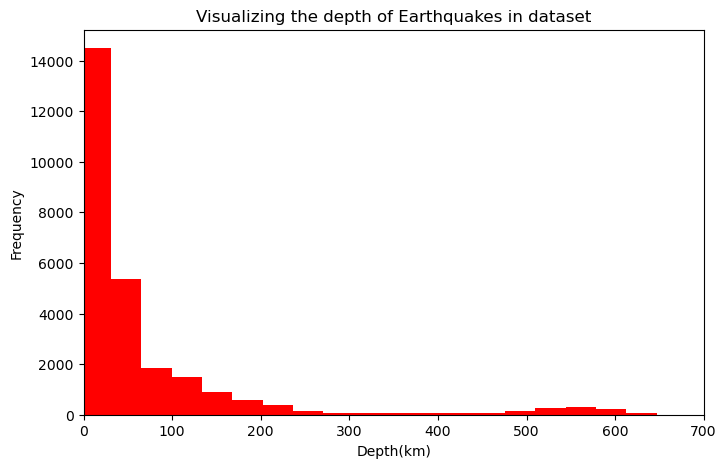

In [12]:
#use histogram to visualize the depth
plt.figure(figsize=(8,5))

plt.hist(eq_df['depth'], bins=20, color='red')
plt.xlim(0,700)
plt.title('Visualizing the depth of Earthquakes in dataset')
plt.xlabel('Depth(km)')
plt.ylabel('Frequency')
plt.show()

Shows all Earthquakes falling under the maximum of 700km

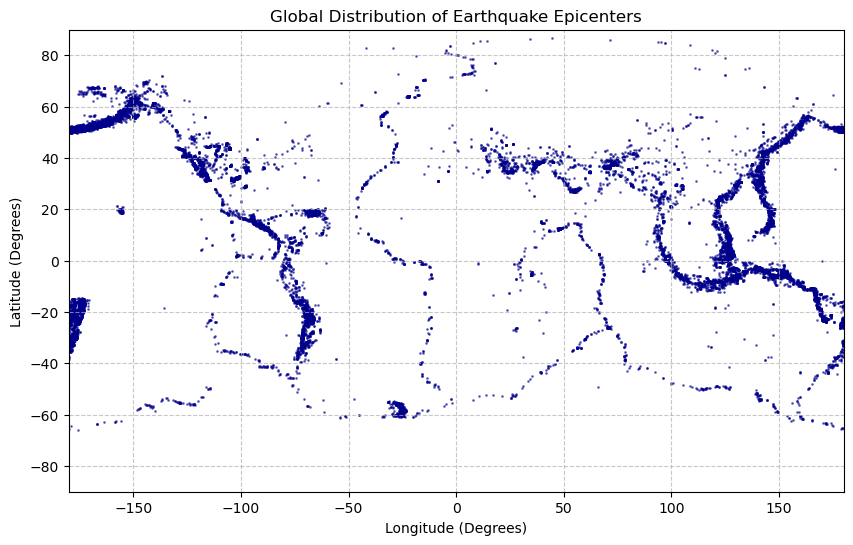

In [13]:
#Plotting a distribution of Earthquake epicentres
plt.figure(figsize=(10, 6))
plt.scatter(eq_df['longitude'], eq_df['latitude'], s=1, alpha=0.5, c='darkblue')

plt.xlim(-180, 180)
plt.ylim(-90, 90)

plt.title('Global Distribution of Earthquake Epicenters')
plt.xlabel('Longitude (Degrees)')
plt.ylabel('Latitude (Degrees)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('epicentre_scatter.png')

plt.show()
plt.close()

Visualisation to show all resords falling between the longitude and latitude ranges.

In [14]:
#finding the distribution of type of event
type_counts = eq_df['type'].value_counts()
print(type_counts)

type
earthquake           26428
mining explosion       167
ice quake               26
volcanic eruption       13
explosion                3
quarry blast             2
Landslide                2
landslide                1
Name: count, dtype: int64


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'earthquake'),
  Text(1, 0, 'mining explosion'),
  Text(2, 0, 'ice quake'),
  Text(3, 0, 'volcanic eruption'),
  Text(4, 0, 'explosion'),
  Text(5, 0, 'quarry blast'),
  Text(6, 0, 'Landslide'),
  Text(7, 0, 'landslide')])

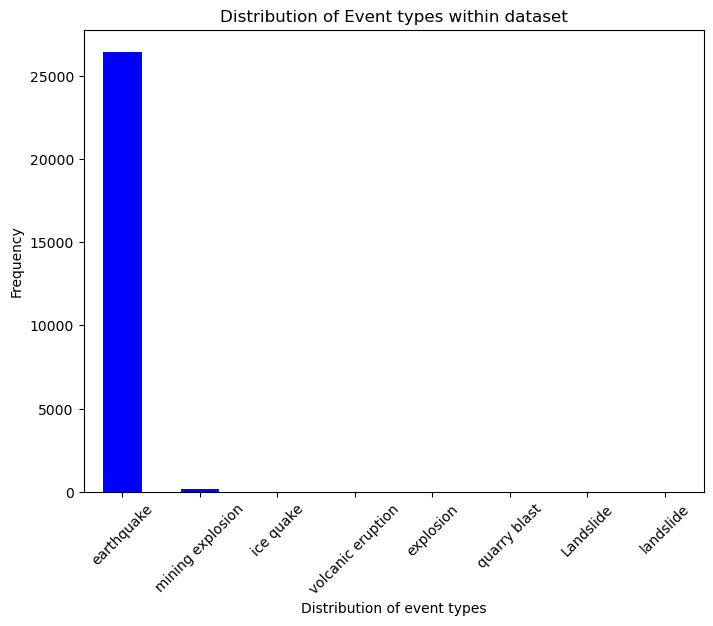

In [15]:
plt.figure(figsize=(8,6))
ax = type_counts.plot(kind='bar', color = 'blue')
plt.title('Distribution of Event types within dataset')
plt.xlabel('Distribution of event types')
plt.ylabel('Frequency')
plt.xticks(rotation=45)


The dataset predominantly holds data for earthquakes globally.  However, some of the held data refers to other disasters such as mining explosions and ice quakes.  In order to focus this analysis on earthquake prediction, the other disasters will need to be filtered out as a part of the cleaning process.

In [16]:
# show individual functions in these blocks
#load_data():


## 3.0 Data Cleaning

Reliable analysis begins with a dataset that is complete, consistent and physically meaningful. Earthquake data is particularly sensitive to measurement quality. Small errors in magnitude, depth, time or location can distort global patterns and weaken any statistical conclusions. For this reason, a structured and domain-appropriate cleaning pipeline was applied to the 2023 global earthquake dataset to ensure that every event used in this project is valid, accurate and suitable for analysis.

The dataset provided by the USGS is generally well structured, but still contains a number of issues that must be addressed before performing meaningful analysis. These include occasional fully duplicated rows, multiple versions of the same earthquake (with earlier records containing outdated measurements), a small number of values that fall outside physically realistic ranges and non earthquieke type explotions. The aim of the cleaning process is not to remove large portions of the data or introduce unnecessary filtering, but simply to correct errors and ensure that each earthquake record is scientifically reasonable.

The cleaning pipeline used in this project consists of the following key steps:

**1. Work on a copy of the data**  
A fresh copy of the dataset is created to protect the original raw data. This avoids accidental modifications and preserves the integrity of the input file.

**2. Remove exact duplicate records**  
Fully duplicated rows occasionally appear in exported or merged datasets. These provide no new information and would artificially inflate earthquake counts if left in place. All exact duplicates were removed.

**3. Remove duplicate earthquake identifiers, keeping only the most recent update**  
The `id` field uniquely identifies each earthquake. In some cases, the same event appears more than once because the USGS updates its magnitude, depth or location as new sensor data arrives. The dataset was sorted by the `updated` timestamp, ensuring that only the most recent and most accurate version of each event is retained.

It is important to note that repeated `id` values do not represent different “stages” of an earthquake. Earthquakes do not physically change in magnitude or depth over time. Multiple entries simply reflect measurement corrections by the seismic network. Therefore, retaining only the latest updated version ensures analytical accuracy.

**4. Convert time fields into proper datetime format**  
The `time` and `updated` columns were converted from text into real datetime objects. This step is required for all time-based analysis such as monthly grouping, temporal visualisation and event ordering.

**5. Ensure core numeric fields are numeric and remove missing essential values**
The core physical attributes of each earthquake latitude, longitude, depth and magnitude must be stored as numbers.These columns were converted to numeric values using errors="coerce", which safely transforms invalid entries (e.g., text or corrupted values) into NaN. Rows missing any of these essential fields were removed, as they cannot be displayed on maps or used in magnitude/depth analysis. The 2023 dataset is generally complete, so this step removed only a very small number of invalid rows.

**6. Remove rows missing essential physical attributes**  
Every earthquake must have a valid `time`, `latitude`, `longitude`, `depth` and `mag`. 
Without these, the event cannot be plotted, positioned geographically, or included in magnitude or depth analysis. Any rows missing these core fields were removed. The 2023 dataset is highly complete, so no events were lost at this stage.

**7. Apply geophysical validity checks**  
Basic physical constraints were enforced to ensure that all retained records represent real, possible earthquakes. These checks include:
- Latitude within −90 to 90 degrees  
- Longitude within −180 to 180 degrees  
- The deepest earthquake in the dataset occurred at 681 km, which is within the scientifically known maximum depth for natural earthquakes (∼700 km). For this reason, depth values were restricted to the range 0–700 km to remove impossible values while keeping all real deep-focus events
- Magnitude within the realistic range of 0 to 10
Any record falling outside these limits was removed, as such values reflect data errors rather than genuine seismic activity.

**8. Keep only real earthquakes (remove explosions and other event types)**
The dataset includes different types of seismic events, such as quarry blasts, mining explosions, ice quakes and testing activity.These are not natural earthquakes and would distort global patterns.Only rows where type == "earthquake" were retained.

Non-essential fields such as `gap`, `dmin`, `nst`, `horizontalError`, `magError` and 
`place` contain some missing values, but these do not prevent spatial or statistical analysis. Removing rows based on these optional metadata fields would unnecessarily reduce the dataset and bias the analysis toward only well-recorded earthquakes
These fields were therefore kept as they are.

In [17]:
#Hasini
def clean_data(df):
    df = df.copy() # work on a copy to avoid modifying the original dataframe

    # Remove rows which are completely duplicated
    original_rows = len(df)
    df = df.drop_duplicates()
    print(f"Removed {original_rows - len(df)} exact duplicate rows.")

     # Convert 'time' and 'updated' columns to datetime
    df["time"] = pd.to_datetime(df["time"], errors="coerce")
    df["updated"] = pd.to_datetime(df["updated"], errors="coerce")

    # If the same earthquake ID appears more than once, keep the most recently added entry)
    rows_before_id_clean = len(df)
    df = (
        df.sort_values("updated") # oldest to newest
        .drop_duplicates(subset="id", keep="last")
    )
    print(f"Removed {rows_before_id_clean - len(df)} rows with duplicate earthquake based on IDs.")

    # Make sure the core numerical columns are actually numbers
    for col in ["latitude", "longitude", "depth", "mag"]:
        df[col] = pd.to_numeric(df[col], errors="coerce")

    # Drop rows missing essential earthquake information
    essential_cols = ["time", "latitude", "longitude", "depth", "mag"]
    rows_before_essential_clean = len(df)
    df = df.dropna(subset=essential_cols)
    print(f"Removed {rows_before_essential_clean - len(df)} rows with missing essential earthquake information in {essential_cols}.")

    # Keep only valid geographical ranges
    rows_before_ranges = len(df)

    valid_lat = df["latitude"].between(-90, 90)
    valid_lon = df["longitude"].between(-180, 180)
    valid_depth = df["depth"].between(0, 700)
    valid_mag = df["mag"].between(0, 10)

    df = df[valid_lat & valid_lon & valid_depth & valid_mag]
    print(f"Removed {rows_before_ranges - len(df)} rows with invalid geographical ranges.")

    #keep only type 'earthquake'
    if 'type' in df.columns:
        rows_before_type_clean = len(df)
        df = df[df["type"] == "earthquake"]
        print(f"Removed {rows_before_type_clean - len(df)} non earthquake events.")

    return df

In [18]:
#Clean the dataset and check how its shape and structure change after cleaning.
#Hasini
print("Raw dataset shape:", eq_df.shape)

cleaned_eq_df = clean_data(eq_df)

print("Cleaned dataset shape:", cleaned_eq_df.shape)
cleaned_eq_df.info()
cleaned_eq_df.head()

Raw dataset shape: (26642, 22)
Removed 1960 exact duplicate rows.
Removed 0 rows with duplicate earthquake based on IDs.
Removed 0 rows with missing essential earthquake information in ['time', 'latitude', 'longitude', 'depth', 'mag'].
Removed 43 rows with invalid geographical ranges.
Removed 207 non earthquake events.
Cleaned dataset shape: (24432, 22)
<class 'pandas.core.frame.DataFrame'>
Index: 24432 entries, 19 to 18434
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   time             24432 non-null  datetime64[ns, UTC]
 1   latitude         24432 non-null  float64            
 2   longitude        24432 non-null  float64            
 3   depth            24432 non-null  float64            
 4   mag              24432 non-null  float64            
 5   magType          24432 non-null  object             
 6   nst              23051 non-null  float64            
 7   gap         

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
19,2023-01-01 09:04:40.710000+00:00,17.830333,-65.985500,10.92,2.78,md,8.0,245.0,0.177300,0.14,...,2023-01-01 09:28:26.140000+00:00,"16 km S of Lamboglia, Puerto Rico",earthquake,0.87,0.63,0.126663,7.0,reviewed,pr,pr
22,2023-01-01 10:09:37.830000+00:00,18.206500,-67.117333,21.88,2.95,md,26.0,97.0,0.005188,0.13,...,2023-01-01 11:14:15.230000+00:00,"2 km ENE of Mayagüez, Puerto Rico",earthquake,0.27,0.40,0.185128,10.0,reviewed,pr,pr
53,2023-01-01 23:56:53.930000+00:00,19.360100,-65.725600,34.00,3.62,md,14.0,270.0,1.110400,0.44,...,2023-01-02 00:32:06.212000+00:00,"103 km N of Suárez, Puerto Rico",earthquake,3.64,25.85,0.080000,4.0,reviewed,pr,pr
65,2023-01-02 04:15:00.130000+00:00,17.947833,-66.908500,12.69,2.80,md,22.0,192.0,0.038830,0.13,...,2023-01-02 05:22:04.140000+00:00,Puerto Rico region,earthquake,0.34,0.28,0.096839,16.0,reviewed,pr,pr
79,2023-01-02 06:56:51.300000+00:00,17.946333,-67.008500,10.55,2.88,md,5.0,230.0,0.113300,0.17,...,2023-01-02 08:25:00.790000+00:00,"5 km SE of La Parguera, Puerto Rico",earthquake,1.27,0.82,0.104091,5.0,reviewed,pr,pr


Overall, The cleaning steps removed duplicates, outdated entries, invalid coordinates, impossible depths, magnitudes and non-earthquake events—while preserving all scientifically valid measurements. No rows were removed due to missing essential fields, confirming that the dataset is generally complete.

The final cleaned dataset is accurate, complete, and suitable for the exploratory analysis and machine-learning model presented later in this project. Importantly, the global structure of the data has been preserved, which is essential for analysing worldwide earthquake behaviour in 2023.

## 4.0 Feature Engineering

The cleaned 2023 USGS earthquake dataset (`cleaned_eq_df`) contains a physically consistent set of global earthquake events: each record has valid latitude/longitude, non-negative depth, and realistic magnitude. The epicentre map from Section 3 showed events concentrated along major tectonic plate boundaries, indicating the cleaning pipeline removed spurious measurements.

Clean, however, is not automatically *analytically useful*. Several fields are too raw for interpretation or modelling:
- `time` is a precise timestamp rather than calendar components (month, season, day of week).
- Depth is recorded in kilometres, whereas seismologists reason in **shallow**, **intermediate**, and **deep** categories.
- Magnitude is continuous, while communication often uses descriptors such as **moderate**, **strong**, or **major**.
- Latitude/longitude encode exact locations but don’t directly compare broad regions (e.g., Americas vs Asia–Pacific).
- Data quality is spread across uncertainty fields (`gap`, `rms`, `depthError`, `magError`, `horizontalError`), which are not directly comparable.

To make the catalogue more interpretable, we perform **feature engineering**: systematic transformations of raw measurements into higher-level variables useful to humans and algorithms. Engineered features are grouped into four concepts:

1) **Temporal** — *when* earthquakes occur  
2) **Physical severity** — *how strong or deep* they are  
3) **Geographical context** — *where* they occur in broad global terms  
4) **Data quality** — *how reliable* the measurements are  

All transformations live in `engineer_features()`. It takes `cleaned_eq_df` and returns `featured_eq_df` with the same rows but richer columns capturing temporal patterns, physical severity, spatial context, and measurement quality. This engineered view underpins Section 5 (exploration) and Section 6 (modelling).

### Feature-Engineering Workflow Overview

Figure below sketches the pipeline: the cleaned catalogue flows through `engineer_features()` to produce the enriched `featured_eq_df` with temporal, physical, geographical, and data-quality variables.


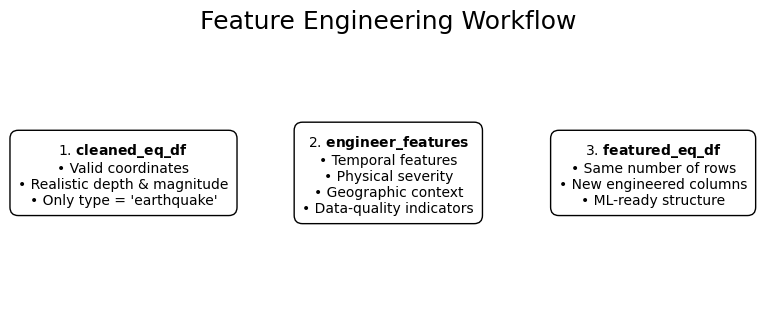

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 3.2))
ax.axis("off")

def box(x, n, text):
    ax.text(
        x, 0.5, f"{n}. {text}",
        ha="center", va="center",
        fontsize=10,
        bbox=dict(boxstyle="round,pad=0.6", fc="white", ec="black"),
    )

box(0.15, 1,
    r"$\bf{cleaned\_eq\_df}$" + "\n"
    "• Valid coordinates\n"
    "• Realistic depth & magnitude\n"
    "• Only type = 'earthquake'")
box(0.50, 2,
    r"$\bf{engineer\_features}$" + "\n"
    "• Temporal features\n"
    "• Physical severity\n"
    "• Geographic context\n"
    "• Data-quality indicators")
box(0.85, 3,
    r"$\bf{featured\_eq\_df}$" + "\n"
    "• Same number of rows\n"
    "• New engineered columns\n"
    "• ML-ready structure")


plt.title("Feature Engineering Workflow", fontsize=18, pad=15)
plt.tight_layout()
plt.show()


*The pipeline flows left→right: cleaned_eq_df (validated events) passes through a single engineer_features() step to produce featured_eq_df, which keeps the same rows but adds temporal, physical, spatial, and quality columns for analysis/modeling.*

### 4.1 Design of the `engineer_features()` Function

Guiding principles:
1) **Domain interpretability** — features reflect seismology concepts (shallow vs deep, magnitude classes, tectonic regions).  
2) **Reproducibility/modularity** — all transformations live in one function for consistent regeneration.

#### 4.1.1 Temporal Features — When Earthquakes Occur
Extracted from the timestamp:
- `year`, `month`, `month_name`
- `day`, `day_of_week`, `day_name`
- `hour` (0–23), `part_of_day` (night/morning/afternoon/evening)
- `is_weekend` (Saturday/Sunday)
- `season` (winter/spring/summer/autumn)

#### 4.1.2 Physical Severity Features — How Strong or Deep
- `depth_category`: shallow (0–70 km), intermediate (70–300 km), deep (300–700 km)
- `mag_category`: minor, light, moderate, strong, major, great, massive
- `is_strong_quake`: magnitude ≥ 6.0
- `energy_log10_J`: log energy via Gutenberg–Richter

#### 4.1.3 Geographical Context Features — Where They Occur
- `abs_latitude`, `abs_longitude`
- `distance_from_equator_km`, `distance_from_prime_meridian_km`
- `hemisphere_NS`, `hemisphere_EW`
- `broad_region`: Americas, Europe–Africa, Asia–Pacific, Oceania

#### 4.1.4 Data-Quality Features — How Reliable
- Boolean flags such as `has_depthError`
- Min–max normalisation of uncertainty fields
- Composite `quality_score` (1 = highest quality)

Below is the implementation used throughout the notebook.


In [128]:
import numpy as np
import pandas as pd
from pandas.api.types import is_datetime64_any_dtype

def engineer_features(df: pd.DataFrame) -> pd.DataFrame:
    """
    Engineer temporal, physical, geographical, and data-quality features
    from the cleaned earthquake dataframe.

    Parameters
    ----------
    df : pd.DataFrame
        Cleaned USGS earthquake catalogue with at least:
        time, latitude, longitude, depth, mag, and optionally
        gap, rms, depthError, magError, horizontalError.

    Returns
    -------
    pd.DataFrame
        Enriched dataframe with the same number of rows as `df`,
        containing additional engineered columns.
    """
    df = df.copy()

    # ===== 1. TEMPORAL FEATURES =====
    if not is_datetime64_any_dtype(df["time"]):
        df["time"] = pd.to_datetime(df["time"], errors="coerce", utc=True)

    dt = df["time"].dt
    df["year"] = dt.year
    df["month"] = dt.month
    df["month_name"] = dt.month_name()
    df["day"] = dt.day
    df["day_of_week"] = dt.dayofweek
    df["day_name"] = dt.day_name()
    df["hour"] = dt.hour
    df["is_weekend"] = df["day_of_week"].isin([5, 6])

    def hour_to_part(h):
        if h < 6:   return "night"
        if h < 12:  return "morning"
        if h < 18:  return "afternoon"
        return "evening"
    df["part_of_day"] = df["hour"].apply(hour_to_part)

    def month_to_season(m):
        if m in (12, 1, 2):  return "winter"
        if m in (3, 4, 5):   return "spring"
        if m in (6, 7, 8):   return "summer"
        return "autumn"
    df["season"] = df["month"].apply(month_to_season)

    # ===== 2. PHYSICAL SEVERITY =====
    df["depth_category"] = pd.cut(
        df["depth"],
        bins=[0, 70, 300, 700],
        labels=["shallow", "intermediate", "deep"],
        right=False
    )
    df["mag_category"] = pd.cut(
        df["mag"],
        bins=[0, 3, 4, 5, 6, 7, 8, 10],
        labels=["minor", "light", "moderate", "strong", "major", "great", "massive"],
        right=False
    )
    df["is_strong_quake"] = df["mag"] >= 6.0
    df["energy_log10_J"] = 1.5 * df["mag"] + 4.8

    # ===== 3. GEOGRAPHICAL CONTEXT =====
    df["abs_latitude"] = df["latitude"].abs()
    df["abs_longitude"] = df["longitude"].abs()
    df["distance_from_equator_km"] = df["abs_latitude"] * 111.0
    df["distance_from_prime_meridian_km"] = (
        df["abs_longitude"] * 111.0 * np.cos(np.deg2rad(df["latitude"]))
    )
    df["hemisphere_NS"] = np.where(df["latitude"] >= 0, "north", "south")
    df["hemisphere_EW"] = np.where(df["longitude"] >= 0, "east", "west")

    def classify_region(lon):
        if lon < -100: return "Americas_west"
        if lon < -30:  return "Americas_east_Atlantic"
        if lon < 60:   return "Europe_Africa"
        if lon < 150:  return "Asia_WestPacific"
        return "Pacific_Oceania"
    df["broad_region"] = df["longitude"].apply(classify_region)

    # ===== 4. DATA QUALITY =====
    for col in ["depthError", "magError", "horizontalError"]:
        if col in df.columns:
            df[f"has_{col}"] = df[col].notna()

    norm_cols = []
    for col in ["gap", "rms", "depthError", "magError", "horizontalError"]:
        if col in df.columns:
            mn, mx = df[col].min(), df[col].max()
            if pd.notna(mn) and pd.notna(mx) and mn != mx:
                norm_name = f"{col}_norm"
                df[norm_name] = (df[col] - mn) / (mx - mn)
                norm_cols.append(norm_name)
    if norm_cols:
        df["quality_score"] = 1 - df[norm_cols].mean(axis=1)

    # ===== 5. CATEGORICAL ENCODINGS =====
    cat_cols = [
        "depth_category", "mag_category", "hemisphere_NS",
        "hemisphere_EW", "broad_region", "part_of_day", "season"
    ]
    for c in cat_cols:
        if c in df.columns:
            df[f"{c}_code"] = df[c].astype("category").cat.codes

    return df


In [ ]:
### 4.2 Applying the Pipeline

print("Applying feature engineering to cleaned_eq_df...\n")
original_columns = list(cleaned_eq_df.columns)
featured_eq_df = engineer_features(cleaned_eq_df)

print("=== Shape comparison ===")
print("Before feature engineering :", cleaned_eq_df.shape)
print("After feature engineering  :", featured_eq_df.shape)

new_cols = [c for c in featured_eq_df.columns if c not in original_columns]
print(f"\nNumber of engineered features added: {len(new_cols)}")
print("Sample of engineered feature names:")
for c in sorted(new_cols)[:20]:
    print(" •", c)

featured_eq_df.head()


Applying feature engineering to cleaned_eq_df...

=== Shape comparison ===
Before feature engineering : (24432, 22)
After feature engineering  : (24432, 59)

Number of engineered features added: 37
Sample of engineered feature names:
 • abs_latitude
 • abs_longitude
 • broad_region
 • broad_region_code
 • day
 • day_name
 • day_of_week
 • depthError_norm
 • depth_category
 • depth_category_code
 • distance_from_equator_km
 • distance_from_prime_meridian_km
 • energy_log10_J
 • gap_norm
 • has_depthError
 • has_horizontalError
 • has_magError
 • hemisphere_EW
 • hemisphere_EW_code
 • hemisphere_NS


,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,magError_norm,horizontalError_norm,quality_score,depth_category_code,mag_category_code,hemisphere_NS_code,hemisphere_EW_code,broad_region_code,part_of_day_code,season_code
19,2023-01-01 09:04:40.710000+00:00,17.830333,-65.985500,10.92,2.78,md,8.0,245.0,0.177300,0.14,...,0.028210,0.008788,0.837641,0,0,0,1,0,2,3
22,2023-01-01 10:09:37.830000+00:00,18.206500,-67.117333,21.88,2.95,md,26.0,97.0,0.005188,0.13,...,0.041231,0.002727,0.924656,0,0,0,1,0,2,3
53,2023-01-01 23:56:53.930000+00:00,19.360100,-65.725600,34.00,3.62,md,14.0,270.0,1.110400,0.44,...,0.017817,0.036768,0.703399,0,1,0,1,0,1,3
65,2023-01-02 04:15:00.130000+00:00,17.947833,-66.908500,12.69,2.80,md,22.0,192.0,0.038830,0.13,...,0.021568,0.003434,0.873287,0,0,0,1,0,3,3
79,2023-01-02 06:56:51.300000+00:00,17.946333,-67.008500,10.55,2.88,md,5.0,230.0,0.113300,0.17,...,0.023183,0.012828,0.842688,0,0,0,1,0,2,3


#### *Applying the Pipeline (shape + new columns printout):* 
*The shape check confirms row count is unchanged; the new columns list shows the engineered features added on top of the raw fields. A larger number of added columns reflects richer temporal/physical/spatial/quality detail.*


### 4.3 Overview of Engineered Feature Groups

The four panels summarise: (a) monthly frequency, (b) magnitude category distribution,
(c) broad-region counts, and (d) the composite quality score.


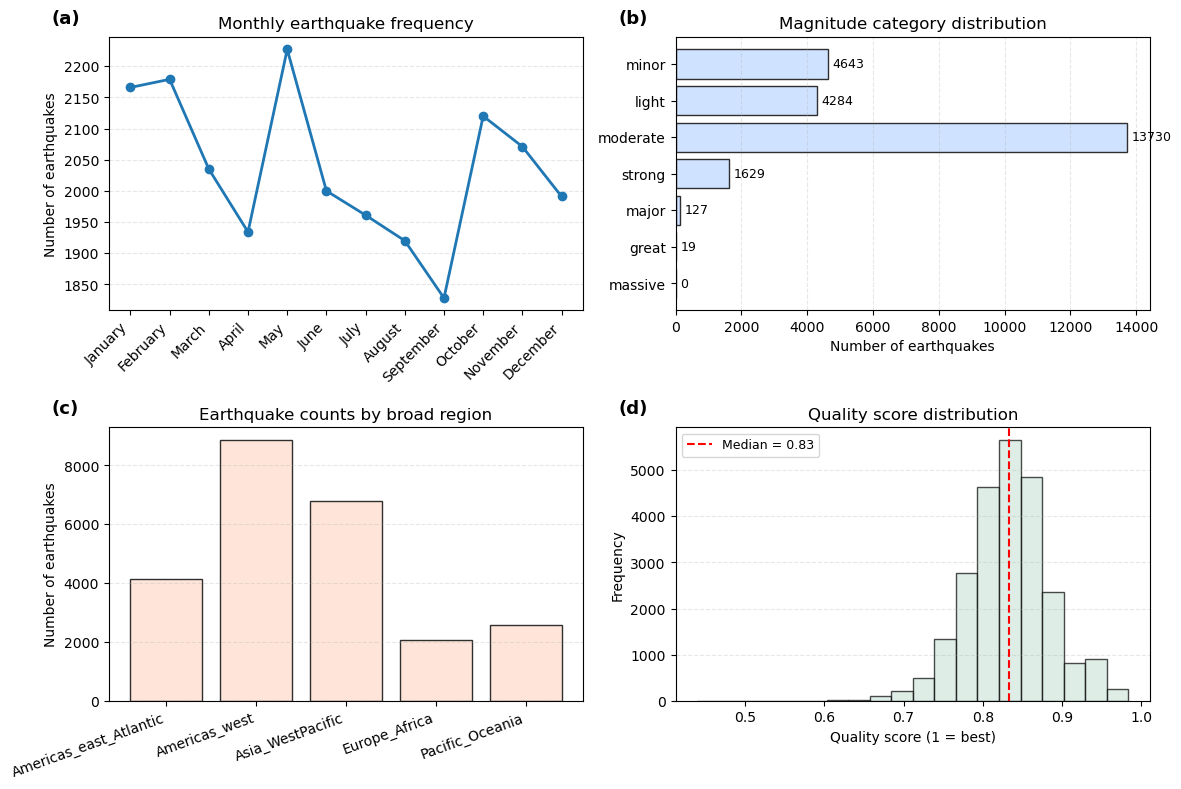

In [131]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.ravel()
labels = ['(a)', '(b)', '(c)', '(d)']

# (a) Monthly frequency
order_months = [
    "January","February","March","April","May","June",
    "July","August","September","October","November","December"
]
month_counts = (
    featured_eq_df["month_name"]
    .value_counts()
    .reindex(order_months)
    .fillna(0)
)
x = np.arange(len(order_months))
axes[0].plot(x, month_counts.values, marker="o", linewidth=2)
axes[0].set_title("Monthly earthquake frequency", fontsize=12)
axes[0].set_xticks(x)
axes[0].set_xticklabels(order_months, rotation=45, ha="right")
axes[0].set_ylabel("Number of earthquakes")
axes[0].grid(axis="y", linestyle="--", alpha=0.3)
axes[0].text(-0.12, 1.05, labels[0], transform=axes[0].transAxes,
             fontsize=13, fontweight="bold")

# (b) Magnitude categories
mag_counts = (
    featured_eq_df["mag_category"]
    .value_counts()
    .sort_index()
)
y_pos = np.arange(len(mag_counts))
axes[1].barh(y_pos, mag_counts.values, color="#cfe2ff", edgecolor="#2f2f2f")
axes[1].set_yticks(y_pos)
axes[1].set_yticklabels(mag_counts.index.astype(str))
axes[1].invert_yaxis()
axes[1].set_title("Magnitude category distribution", fontsize=12)
axes[1].set_xlabel("Number of earthquakes")
axes[1].grid(axis="x", linestyle="--", alpha=0.3)
axes[1].text(-0.12, 1.05, labels[1], transform=axes[1].transAxes,
             fontsize=13, fontweight="bold")
for i, v in enumerate(mag_counts.values):
    axes[1].text(v + mag_counts.values.max()*0.01, i, str(v),
                 va="center", fontsize=9)

# (c) Broad regions
region_counts = (
    featured_eq_df["broad_region"]
    .value_counts()
    .sort_index()
)
x2 = np.arange(len(region_counts))
axes[2].bar(x2, region_counts.values, color="#ffe5d9", edgecolor="#2f2f2f")
axes[2].set_xticks(x2)
axes[2].set_xticklabels(region_counts.index.astype(str), rotation=20, ha="right")
axes[2].set_title("Earthquake counts by broad region", fontsize=12)
axes[2].set_ylabel("Number of earthquakes")
axes[2].grid(axis="y", linestyle="--", alpha=0.3)
axes[2].text(-0.12, 1.05, labels[2], transform=axes[2].transAxes,
             fontsize=13, fontweight="bold")

# (d) Quality score
ax = axes[3]
if "quality_score" in featured_eq_df.columns:
    qs = featured_eq_df["quality_score"].dropna()
    ax.hist(qs, bins=20, edgecolor="black", alpha=0.7, color="#d1e7dd")
    median_qs = qs.median()
    ax.axvline(median_qs, color="red", linestyle="--", linewidth=1.5,
               label=f"Median = {median_qs:.2f}")
    ax.set_title("Quality score distribution", fontsize=12)
    ax.set_xlabel("Quality score (1 = best)")
    ax.set_ylabel("Frequency")
    ax.grid(axis="y", linestyle="--", alpha=0.3)
    ax.legend(fontsize=9)
else:
    ax.text(0.5, 0.5, "quality_score not available",
            ha="center", va="center", fontsize=11)
    ax.axis("off")
ax.text(-0.12, 1.05, labels[3], transform=ax.transAxes,
        fontsize=13, fontweight="bold")

plt.tight_layout()
plt.show()


#### *Overview panels (a–d):*

*(a) Monthly frequency: Read peaks/troughs to spot seasonal patterns; a flat line means no clear month preference.*
*(b) Magnitude categories: Longer bars to the left mean more events in that severity class; invert-y layout puts the higher severities nearer the top for quick scanning.*
*(c) Broad regions: Taller bars mark more activity in that region; compare to plate-boundary expectations.*
*(d) Quality score: Histogram shows the spread of data quality; the median line highlights the typical score. A right-skew toward 1.0 means generally higher-confidence measurements.*

### 4.4 Additional Feature-Level Visualisations

These enhanced plots highlight structure in each feature group.

#### 4.4.1 Magnitude severity profile
A horizontal profile ordered by severity, with counts labeled.


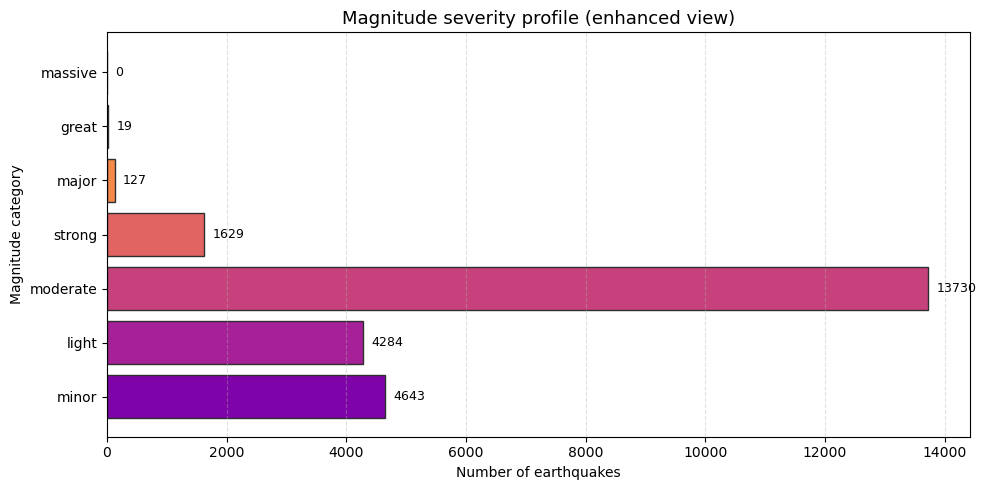

In [132]:
import matplotlib.pyplot as plt
import numpy as np

mag_counts = (
    featured_eq_df["mag_category"]
    .value_counts()
    .sort_index()
)
colors = plt.cm.plasma(np.linspace(0.25, 0.95, len(mag_counts)))

plt.figure(figsize=(10, 5))
plt.barh(mag_counts.index.astype(str), mag_counts.values, color=colors, edgecolor="#2f2f2f")
plt.title("Magnitude severity profile (enhanced view)", fontsize=13)
plt.xlabel("Number of earthquakes")
plt.ylabel("Magnitude category")
plt.grid(axis="x", linestyle="--", alpha=0.4)
for i, v in enumerate(mag_counts.values):
    plt.text(v + max(mag_counts.values)*0.01, i, str(v), va="center", fontsize=9)
plt.tight_layout()
plt.show()


*Bars ordered from lowest to highest severity. Quickly shows whether the catalogue is dominated by lower-magnitude events or has a substantial tail of strong/major quakes. End labels make category comparison immediate.*

#### 4.4.2 Magnitude distribution by depth category
Violin plots reveal full distribution shape within each depth class.


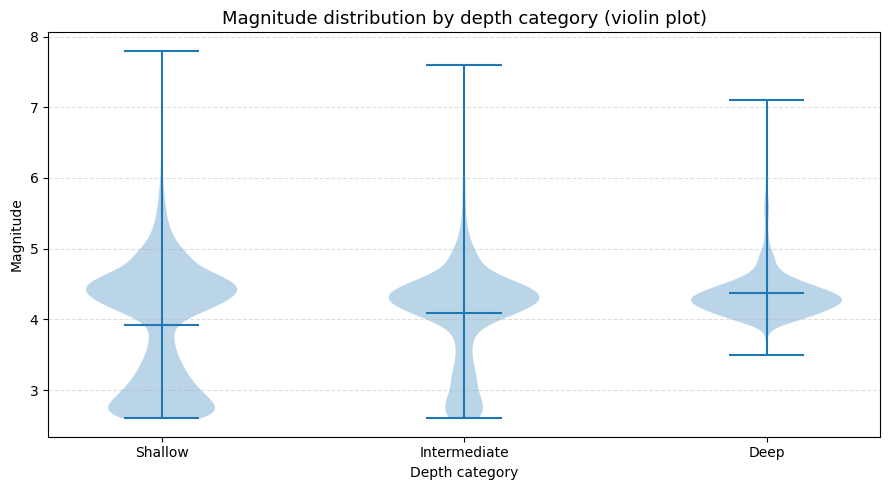

In [133]:
plt.figure(figsize=(9, 5))
data = [
    featured_eq_df[featured_eq_df["depth_category"] == cat]["mag"].dropna()
    for cat in ["shallow", "intermediate", "deep"]
]
plt.violinplot(data, showmeans=True, showextrema=True)
plt.title("Magnitude distribution by depth category (violin plot)", fontsize=13)
plt.xlabel("Depth category")
plt.ylabel("Magnitude")
plt.xticks([1, 2, 3], ["Shallow", "Intermediate", "Deep"])
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()


*Each violin shows the full magnitude distribution within a depth class. Width reflects density; long tails or multi-peaks indicate skew or multiple modes. Mean/extrema markers help compare central tendency and spread across shallow/intermediate/deep events.*

#### 4.4.3 Global epicentre map with engineered features
Colour encodes magnitude; marker size encodes depth category.


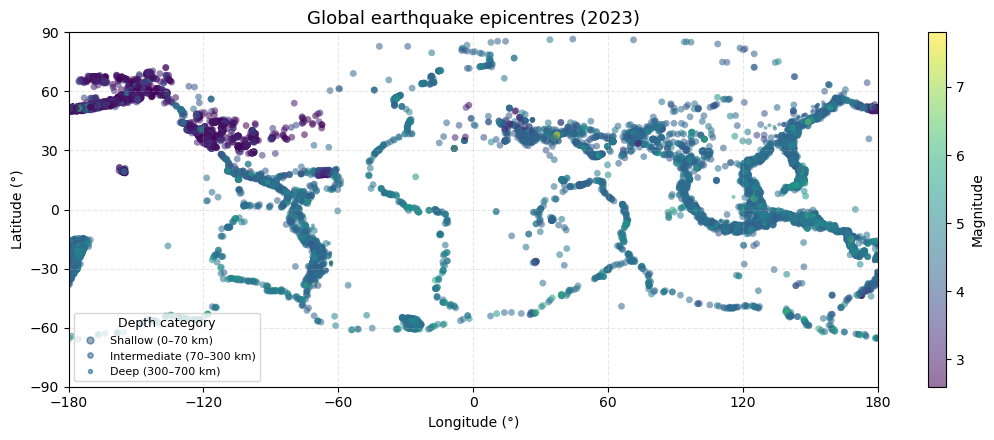

In [134]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

size_map = {"shallow": 24, "intermediate": 14, "deep": 8}
marker_sizes = (
    featured_eq_df["depth_category"]
    .map(size_map)
    .astype("float")
    .fillna(10.0)
)

fig, ax = plt.subplots(figsize=(11, 4.5))
sc = ax.scatter(
    featured_eq_df["longitude"],
    featured_eq_df["latitude"],
    c=featured_eq_df["mag"],
    s=marker_sizes,
    alpha=0.55,
    cmap="viridis",
    edgecolors="none"
)
ax.set_title("Global earthquake epicentres (2023)", fontsize=13)
ax.set_xlabel("Longitude (°)")
ax.set_ylabel("Latitude (°)")
ax.set_xlim(-180, 180)
ax.set_ylim(-90, 90)
ax.set_xticks(np.arange(-180, 181, 60))
ax.set_yticks(np.arange(-90, 91, 30))
ax.grid(True, linestyle="--", alpha=0.3)

cbar = plt.colorbar(sc, ax=ax)
cbar.set_label("Magnitude")

legend_elements = [
    Line2D([0], [0], marker='o', linestyle='',
           markersize=np.sqrt(size_map["shallow"]), label='Shallow (0–70 km)',
           markerfacecolor='grey', alpha=0.7),
    Line2D([0], [0], marker='o', linestyle='',
           markersize=np.sqrt(size_map["intermediate"]), label='Intermediate (70–300 km)',
           markerfacecolor='grey', alpha=0.7),
    Line2D([0], [0], marker='o', linestyle='',
           markersize=np.sqrt(size_map["deep"]), label='Deep (300–700 km)',
           markerfacecolor='grey', alpha=0.7),
]
ax.legend(handles=legend_elements, title="Depth category",
          loc="lower left", fontsize=8, title_fontsize=9, frameon=True)

plt.tight_layout()
plt.show()


*Points show epicentres; color encodes magnitude and size encodes depth (larger = shallower). Clustering along plate boundaries validates spatial patterns; visually scan for where stronger or shallow events concentrate. Legends clarify both color (magnitude) and size (depth).*

### 4.5 Summary and Reflection

Feature engineering converted the cleaned USGS 2023 catalogue into an enriched, analysis-ready dataset. `engineer_features()` adds temporal descriptors, physical severity categories, spatial context, and data-quality indicators while preserving event count. Diagnostics show physically sensible behaviour: seasonal and monthly patterns, dominance of shallow events, regional clustering along plate boundaries, and a broad `quality_score` range. This engineered dataset `featured_eq_df` is the foundation for Section 5 exploration and Section 6 modelling; rerunning `engineer_features()` on future catalogues regenerates a comparable feature set for reproducible analysis.


In [ ]:
#plot_magnitude_distribution()

In [ ]:
#plot_depth_boxplot()

Object-Oriented Programming Section  

Create at least two classes: 

Class 1: EarthquakeDataset 

Handles: 

Loading 

Cleaning 

Feature engineering 

Class 2: EarthquakeVisualizer 

Handles: 

All plots (KDE, boxplots, scatter, violin, heatmap, 3D) 

Optional Class: EarthquakeModel 

Handles: 

Classification 

Clustering 

You must show good encapsulation, methods, attributes, and documentation. 

A-grade notebooks always demonstrate clear OOP. 

Data Preparation Section 

Using your functions & classes: 

Load dataset 

Convert timestamps 

Handle missing values 

Clean column types 

Feature engineering (month, depth class, strong quake flag) 

Show: 

head() 

info() 

describe() 

Include short commentary below each output, not above. 

Univariate Analysis Section 

Follow A-grade style: 

For each variable: 

One sentence explaining why this variable matters 

One function call to create the plot 

Short interpretation paragraph 

Variables: 

Magnitude (KDE) 

Depth (boxplot + histogram) 

NSt or magNst 

Dmin 

Monthly or daily counts 

Keep code clean and modular. 

In [ ]:
#magnitude(KDE) Dan
#Depth
#NSt
#Dmin
#monthly counts


Bivariate Analysis Section 

Use the same pattern: 

explain → code → visual → interpretation 

Analyses: 

Magnitude vs Depth + correlation 

Depth vs DepthError 

Net vs Depth (violin) + ANOVA 

Time vs Magnitude 

MagType vs Net (heatmap)

3D Visualisation Section (CT7201 Bonus Marks) 

Implement at least one 3D visual: 

3D scatter plot 

(lat, lon, depth coloured by magnitude) 

Optional: 

3D clustering visual 

3D classification decision boundary 

This significantly boosts grade potential because it shows advanced scripting.

Machine Learning Section 

The ML part doesn’t need to be huge: 

Recommended simple model: 

Logistic Regression 
 OR 

Decision Tree 
 OR 

K-means clustering 

Must include: 

Train/test split 

Confusion matrix or cluster summary 

Short interpretation 

This satisfies the “application of algorithms” requirement. 

Discussion Section 

Summarise: 

global earthquake patterns 

spatial trends 

magnitude–depth relationships 

model performance 

limitations 

strengths of scripting approach 

Write academically. 

Conclusion Section 

Short, direct summary: 

what was achieved 

key insights 

usefulness of Python scripting 

References 

USGS 

Python libraries 

Any academic papers if used 